In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import gnk
from elfi.methods.parameter_inference import ROMC
model = gnk.get_model()
model.source_net.edges()

INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


[('A', 'GNK'),
 ('_A_8060', 'A'),
 ('_A_c5a2', 'A'),
 ('B', 'GNK'),
 ('_B_0d5f', 'B'),
 ('_B_ed27', 'B'),
 ('g', 'GNK'),
 ('_g_0bc0', 'g'),
 ('_g_5d05', 'g'),
 ('k', 'GNK'),
 ('_k_dcd4', 'k'),
 ('_k_c595', 'k'),
 ('GNK', 'ss_order'),
 ('ss_order', 'd')]

['A', 'B', 'g', 'k']


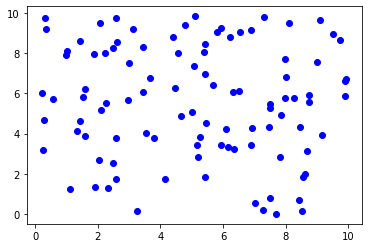

In [2]:
x = model.generate(100)
print(model.parameter_names)

plt.plot(x["A"], x["B"], "bo")
plt.show()

In [3]:
romc = ROMC(model, discrepancy_name="d", left_lim=np.array([0., 0., 0., 0.]), right_lim =np.array([10, 10,  10, 10]))

In [4]:
n1 = 20
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems ###


 /home/givasile/ORwDS/elfi/elfi/examples/gnk.py:64: RuntimeWarning:overflow encountered in exp
 /home/givasile/ORwDS/elfi/elfi/examples/gnk.py:64: RuntimeWarning:invalid value encountered in true_divide
 /home/givasile/ORwDS/elfi/elfi/examples/gnk.py:137: RuntimeWarning:overflow encountered in square
 /home/givasile/ORwDS/elfi/elfi/examples/gnk.py:64: RuntimeWarning:overflow encountered in power


Time: 8.832 sec███████████████████████████████████████████---| 95.0% Complete


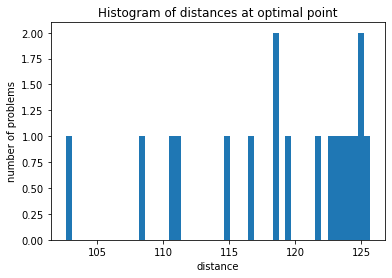

In [5]:
romc.theta_hist()

In [6]:
eps = 440
region_mode = "romc_jacobian"
romc.estimate_regions(eps=eps, region_mode=region_mode)

### Estimating regions ###

Time: 119.388 sec ████████████████████████████████████████---| 95.0% Complete



In [7]:
romc.accepted

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True]

In [8]:
n2 = 40
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Time: 0.894 sec ████████████████████████████████████████████-| 99.9% Complete



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b13b27828>,
      dtype=object)

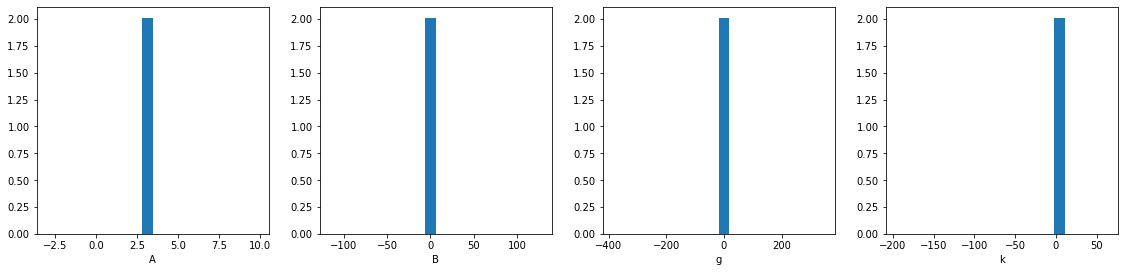

In [9]:
romc.result.plot_marginals(weights=romc.result.weights)

In [10]:
romc.samples[:,:,3]

array([[-8.97e+00, -2.10e+00, -1.15e+01, -1.15e+01,  6.18e-01, -7.13e+00,
        -8.30e+00, -7.01e+00, -1.01e+00, -7.39e+00, -7.29e+00, -2.79e+00,
        -5.24e+00, -8.52e+00, -5.12e+00, -9.98e+00, -5.50e+00, -9.09e-01,
        -8.22e+00, -1.49e+01, -9.65e+00, -2.45e+00, -1.23e+01, -2.82e+00,
        -2.50e+00,  1.43e-01, -6.13e+00, -4.06e+00, -2.75e+00, -6.63e+00,
        -5.02e+00, -7.62e+00, -9.90e+00, -6.99e+00, -9.06e+00, -5.11e+00,
        -9.87e+00, -6.00e+00, -3.69e+00, -5.73e+00],
       [-9.55e+01, -4.95e+01, -5.42e+01, -3.63e+01, -7.61e+01, -4.20e+01,
        -5.97e+01, -5.42e+01, -1.60e+01, -6.38e+01, -2.27e+01, -3.72e+01,
        -2.86e+01, -2.01e+01, -6.80e+01, -1.42e+01, -5.12e+01, -4.80e+01,
        -9.89e+01, -3.47e+01, -8.92e+01, -8.21e+01, -9.05e+01, -2.31e+01,
        -6.75e+01, -5.15e+01, -1.02e+02, -4.57e+01, -5.68e+01, -2.58e+01,
        -7.34e+01, -4.57e+01, -8.31e+01, -4.59e+01, -6.44e+01, -2.65e+01,
        -5.87e+01, -7.00e+01, -3.41e+01, -6.59e+01],
      